In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import json

In [43]:
work_dir = "data/gen_voc"
json_path = "data/prompts/voc_prompts.json"
start = 0
end = 10

In [10]:
with open(json_path, 'r') as f:
    prompts = json.load(f)

prompts[0]

{'filename': '0.jpg',
 'caption': 'a baby in a yellow toy car; person car',
 'class_prompt': 'person car'}

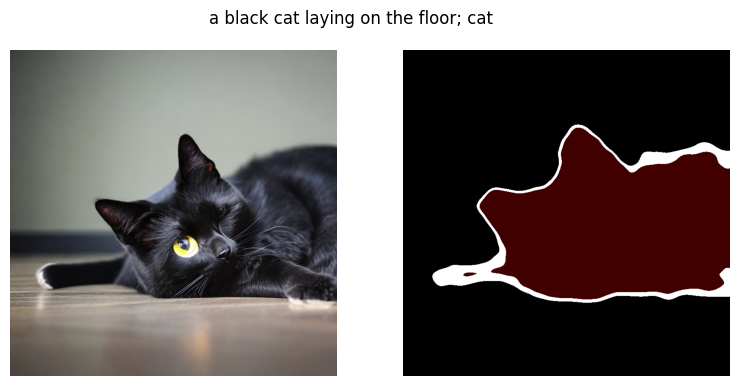

In [41]:
idx = 1
def plot(idx):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    p = prompts[idx]

    img = plt.imread(os.path.join(work_dir, 'image', p['filename']))
    msk = plt.imread(os.path.join(work_dir, 'mask', p['filename'].replace('jpg', 'png')))

    fig.suptitle(p['caption'])
    axes[0].imshow(img)
    axes[1].imshow(msk)
    plt.tight_layout()
    axes[0].axis('off')
    axes[1].axis('off')

    save_filepath = os.path.join(work_dir, 'viz', p['filename'].replace('jpg', 'png'))
    os.makedirs(os.path.dirname(save_filepath), exist_ok=True)
    plt.savefig(save_filepath, dpi=150)

plot(idx)

In [45]:
for idx in range(start, end):
    plot(idx)
    plt.close()